In [1]:
import concurrent.futures as cf
with cf.ProcessPoolExecutor(max_workers=1) as executor:
    future = executor.submit(pow, 323, 1235)
    print(future.result())

7330187419711662525292446729952277967765833457839424373869116780517420149076198183898894905236339668910883614705749593461204605714622607490668683222808958179218191780471063516227460897872227090014097232715359988867409006240081206335670819048146328123935337644631341482039026277834498173918554303355637321060412263715606736911839847081166018722332660742474936263046482602637679145832497919840537694829188335160914131310111239449199642739655793719812086149415859534959085359215402107080568853413877372159233452025442228651418507639010743174496936173262981681095359156359401217962539764203947129055258900852300663811552683018727645219707243611502505332407412509113706415784954450373499498470564461122438759199401776852200401606640428677779377601753155808428527723343610817938497649317098807976560094452142608380040084257453294862872175833371967399756248792099979580669182692895291737594003884626270278670234491588018888596571060169103937561057223083861024046092685665503687387204434227037124219374130642

In [2]:
import concurrent.futures
import urllib.request

URLS = ['http://www.foxnews.com/',
        'http://www.cnn.com/',
        'http://europe.wsj.com/',
        'http://www.bbc.co.uk/',
        'http://some-made-up-domain.com/']

# Retrieve a single page and report the URL and contents
def load_url(url, timeout):
    with urllib.request.urlopen(url, timeout=timeout) as conn:
        return conn.read()

# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    # Start the load operations and mark each future with its URL
    future_to_url = {executor.submit(load_url, url, 60): url for url in URLS}
    for future in concurrent.futures.as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:
            print('%r generated an exception: %s' % (url, exc))
        else:
            print('%r page is %d bytes' % (url, len(data)))
print(future_to_url)            

'http://some-made-up-domain.com/' page is 886 bytes
'http://www.foxnews.com/' page is 229177 bytes
'http://www.cnn.com/' page is 153085 bytes
'http://www.bbc.co.uk/' page is 265602 bytes
'http://europe.wsj.com/' page is 905011 bytes
{<Future at 0x7fb92834af98 state=finished returned bytes>: 'http://www.foxnews.com/', <Future at 0x7fb9280d4198 state=finished returned bytes>: 'http://www.bbc.co.uk/', <Future at 0x7fb9280d4550 state=finished returned bytes>: 'http://some-made-up-domain.com/', <Future at 0x7fb9280ba9e8 state=finished returned bytes>: 'http://www.cnn.com/', <Future at 0x7fb9280baf98 state=finished returned bytes>: 'http://europe.wsj.com/'}


<IPython.core.display.Javascript object>


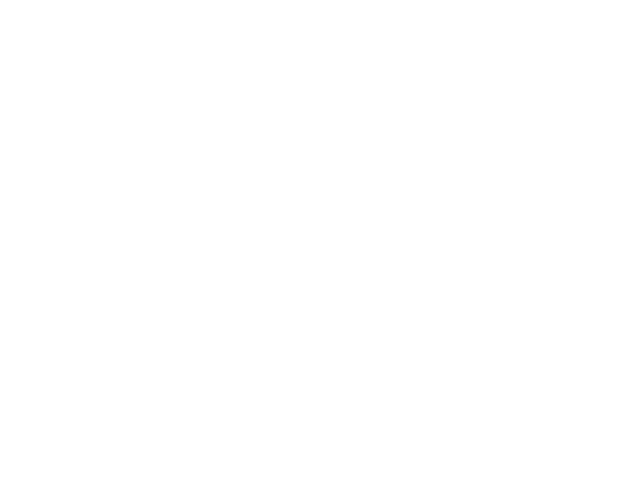

RuntimeError: No MovieWriters available!

In [6]:
from IPython.display import HTML
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
N = 5
M = 100
points_evo_array = np.random.rand(M,N)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, M), ylim=(0, np.max(points_evo_array)))
lines = []

lines = [ax.plot([], [])[0] for _ in range(N)]

def init():    
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j,line in enumerate(lines):
        line.set_data(range(i), [points_evo_array[:i,j]])
    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,np.arange(1, M), init_func=init, interval=10, blit=True)

HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


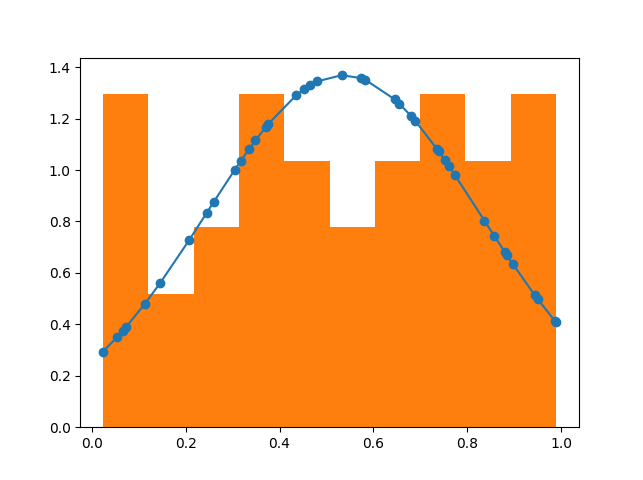

In [5]:
import random
N = 40
M = 100
a = [[random.random() for i in range(N)] for j in range(M)]
# now plot a dynamic graph

#first the imports 
# import matplotlib
# matplotlib.use('TkAgg')
import scipy.stats as stats
import matplotlib.pyplot as plt

import numpy as np
import time

%matplotlib notebook
#initialise the graph and settings
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

#fig.show()
fig.canvas.draw()

#iterate - plot, erase
for i in range(0,M):
    #print i
    ax.clear() # - Clear
    h = sorted(a[i])
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))
    ax.plot(h,fit,'-o') # fit the line
    ax.hist(h,normed=True) # fit the histogram
    fig.canvas.draw()   # draw
    time.sleep(0.1)    #sleep
    # print('iterated')

In [11]:
# Check file for new data.

import time

f = open(r'/home/john/Projects/crete/test.txt', 'r')

while True:

    line = f.readline()
    if not line:
        time.sleep(1)
        #print( 'Nothing New')
    else:
        print ('Call Function: ', line)

Call Function:  hello
Call Function:   from john
Call Function:  

Call Function:  f
Call Function:  abs


KeyboardInterrupt: 

In [12]:
import asyncio

# Borrowed from http://curio.readthedocs.org/en/latest/tutorial.html.
@asyncio.coroutine
def countdown(number, n):
    while n > 0:
        print('T-minus', n, '({})'.format(number))
        yield from asyncio.sleep(1)
        n -= 1

loop = asyncio.get_event_loop()
tasks = [
    asyncio.ensure_future(countdown("A", 2)),
    asyncio.ensure_future(countdown("B", 3))]
loop.run_until_complete(asyncio.wait(tasks))
loop.close()

AttributeError: 'module' object has no attribute 'ensure_future'

In [14]:
import sys
sys.__version__

AttributeError: 'module' object has no attribute '__version__'